In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [3]:
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
data.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [6]:
data.fillna(method='ffill', inplace=True)

In [18]:
def CheckSkewness(data, column):
    plt.figure(figsize=(14, 8))
    
    plt.subplot(1, 2, 1)
    sns.distplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")  # Set the title after sns.distplot
    
    plt.subplot(1, 2, 2)
    stats.probplot(data[column], dist='norm', plot=plt)
    plt.title(f"Probability Plot of {column}")  # Set the title after stats.probplot
    
    plt.show()



C:\Users\lenovo\AppData\Local\Temp\ipykernel_884\3539145407.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


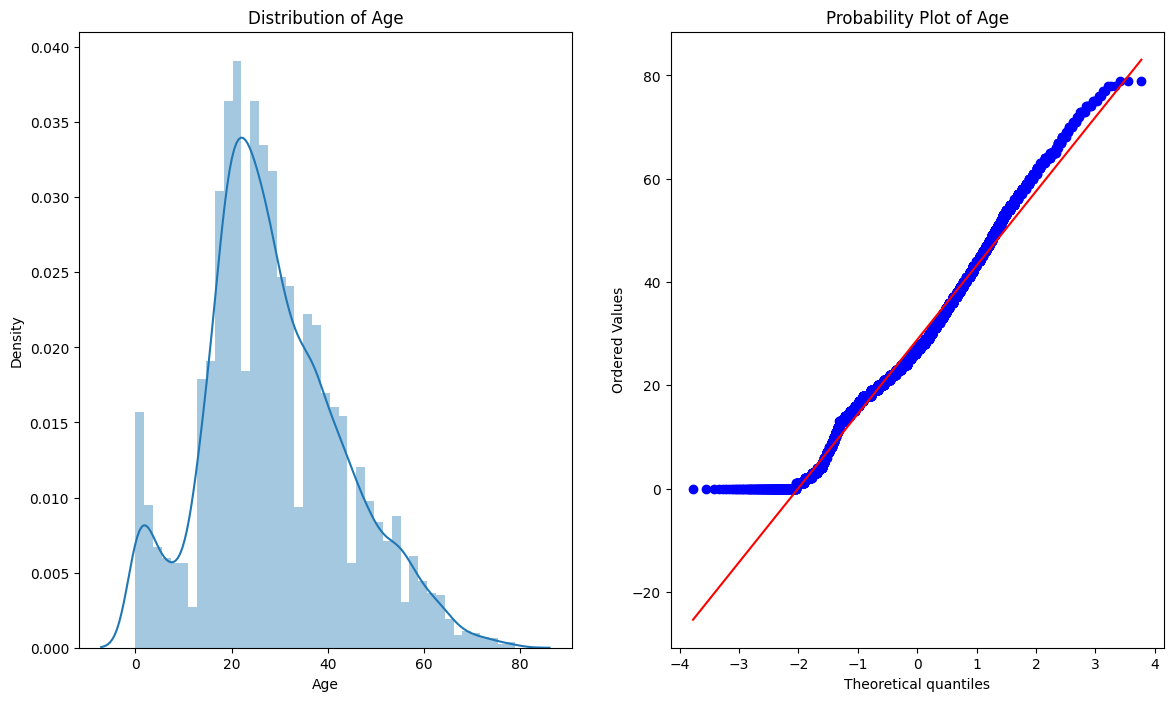

C:\Users\lenovo\AppData\Local\Temp\ipykernel_884\3539145407.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


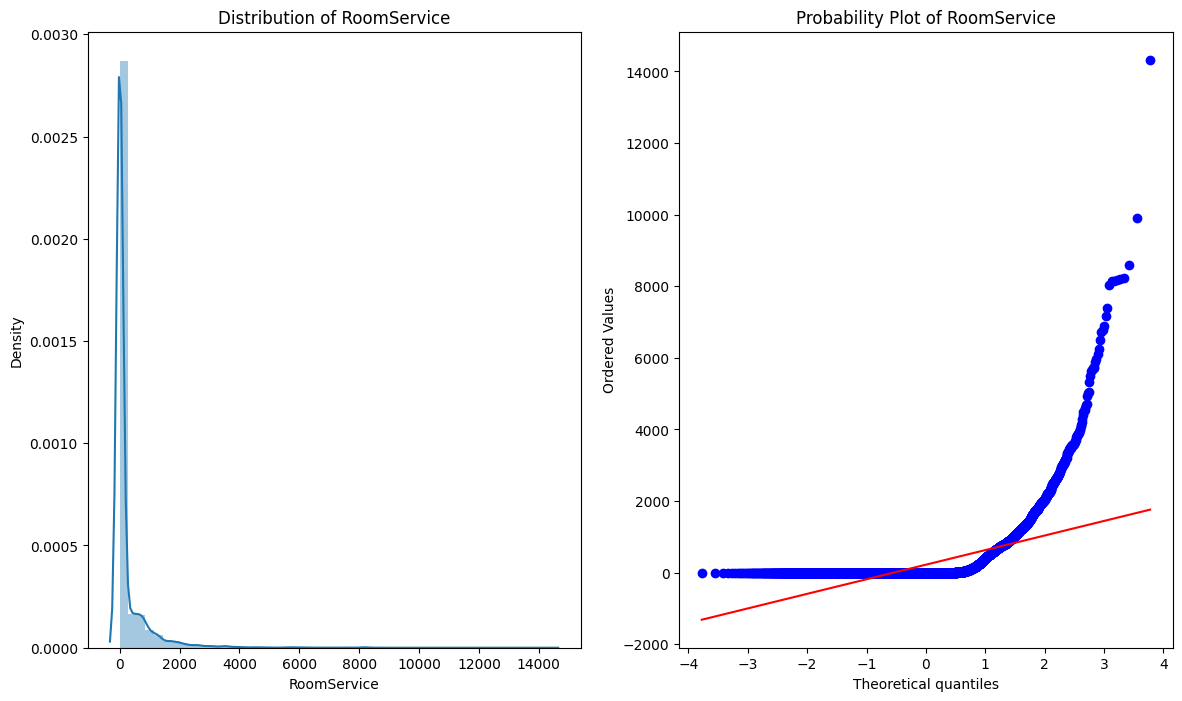

C:\Users\lenovo\AppData\Local\Temp\ipykernel_884\3539145407.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


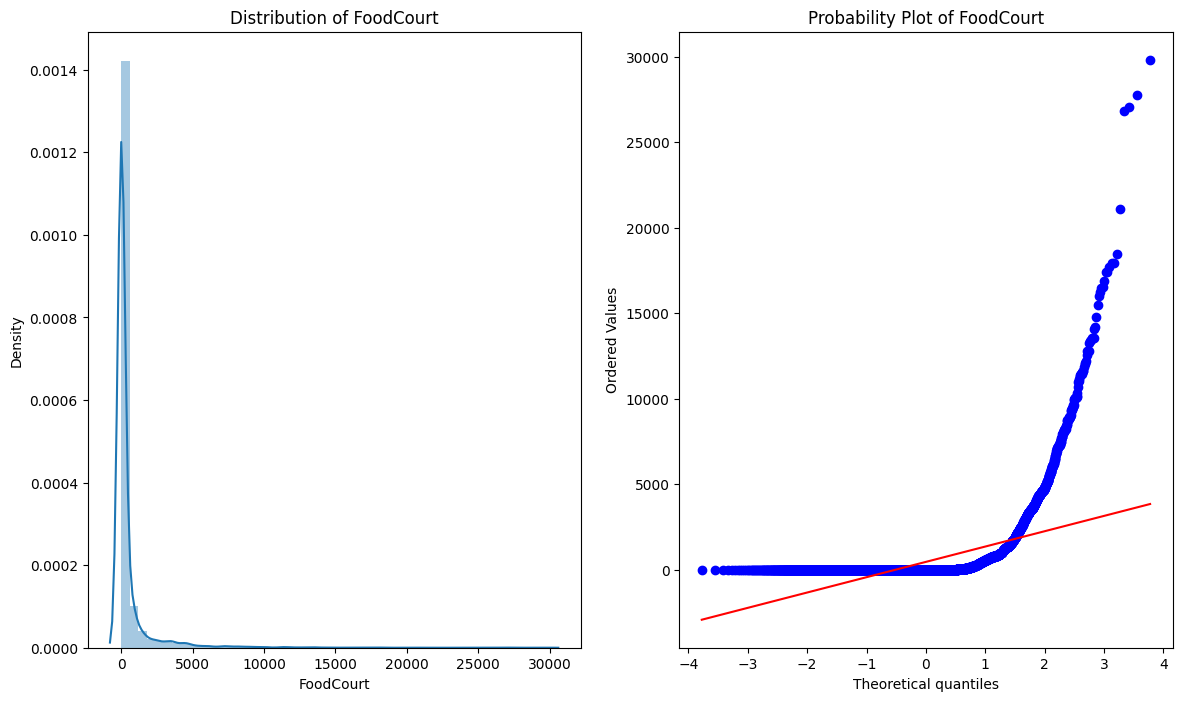

C:\Users\lenovo\AppData\Local\Temp\ipykernel_884\3539145407.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


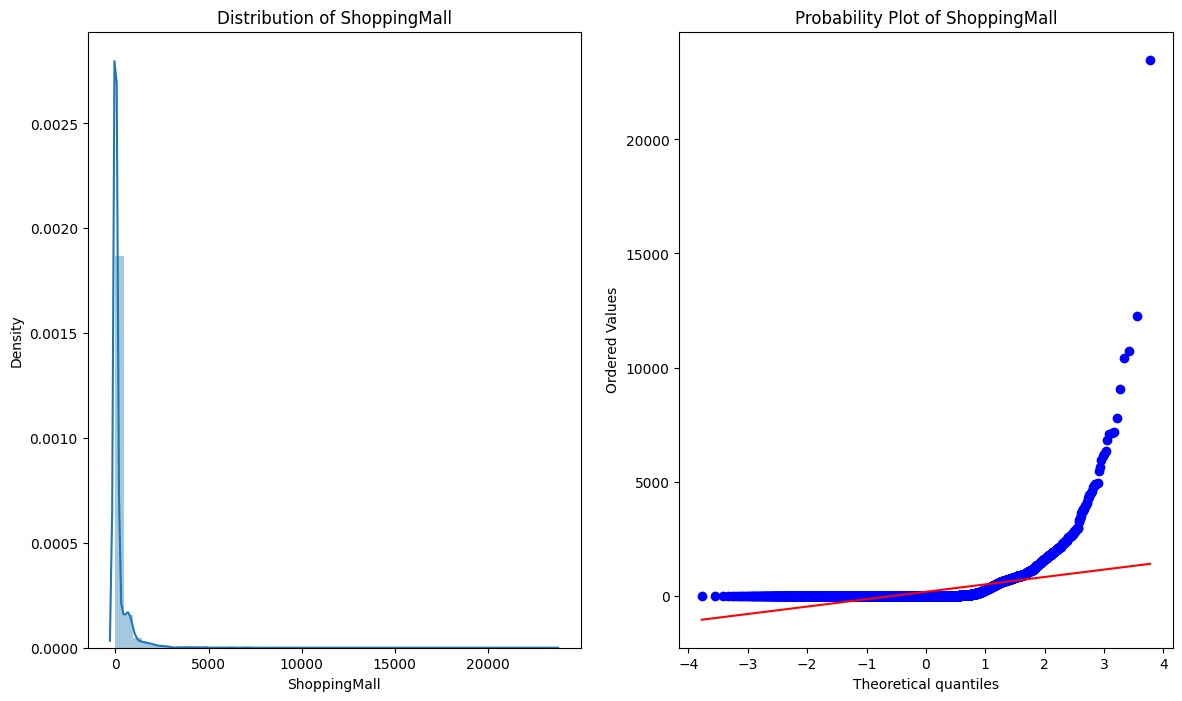

C:\Users\lenovo\AppData\Local\Temp\ipykernel_884\3539145407.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


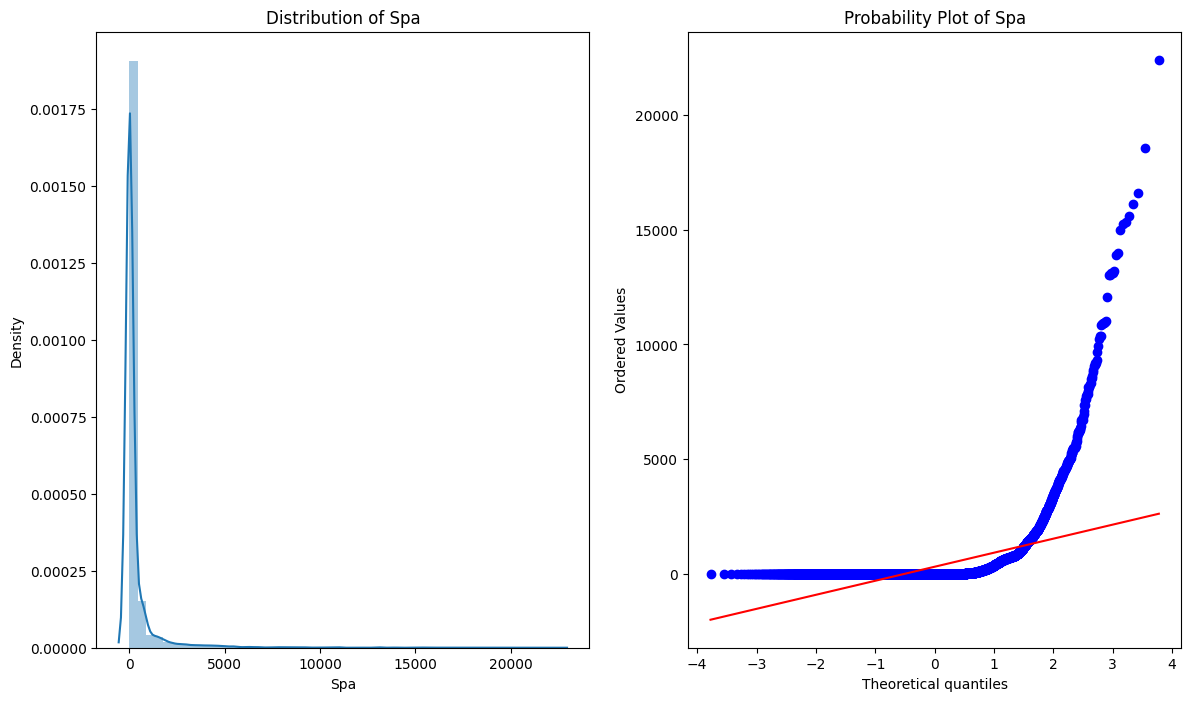

C:\Users\lenovo\AppData\Local\Temp\ipykernel_884\3539145407.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


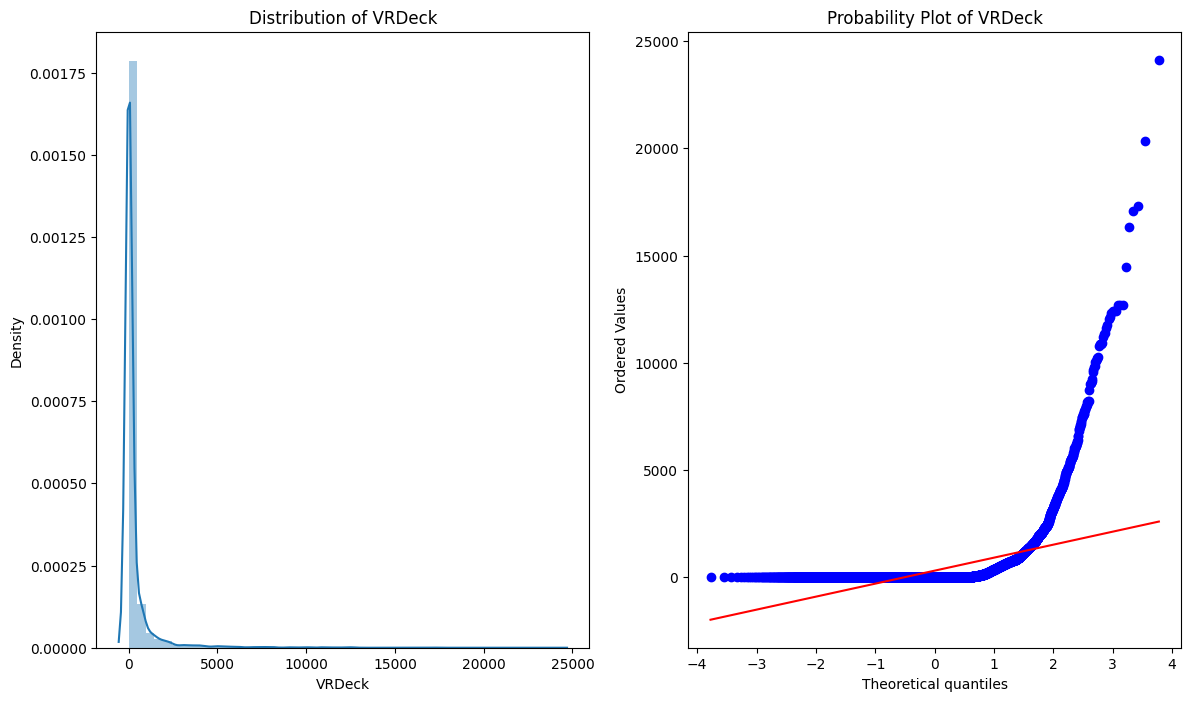

In [20]:
numrical_columns = data.select_dtypes(np.number)
for column in numrical_columns.columns :
    CheckSkewness(data, column)

In [21]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer,

In [45]:
trf1 = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p), ['VRDeck'])
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [46]:
after = trf1.fit_transform(data)
after

,VRDeck,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,Name,Transported
0,0.000000,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,3.806662,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,Juanna Vines,True
2,3.912023,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,Altark Susent,False
3,5.267858,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,Solam Susent,False
4,1.098612,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,4.317488,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,Gravior Noxnuther,False
8689,0.000000,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,0.000000,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,Fayey Connon,True
8691,8.082093,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,Celeon Hontichre,False


C:\Users\lenovo\AppData\Local\Temp\ipykernel_884\3539145407.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


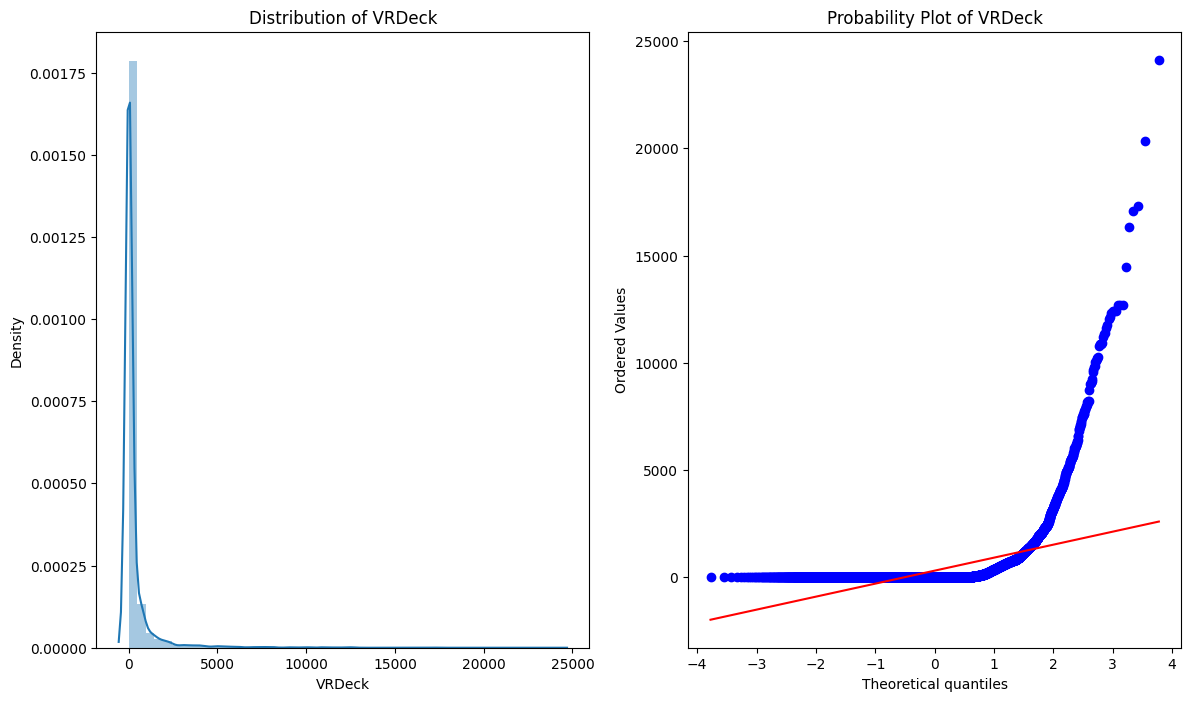

C:\Users\lenovo\AppData\Local\Temp\ipykernel_884\3539145407.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


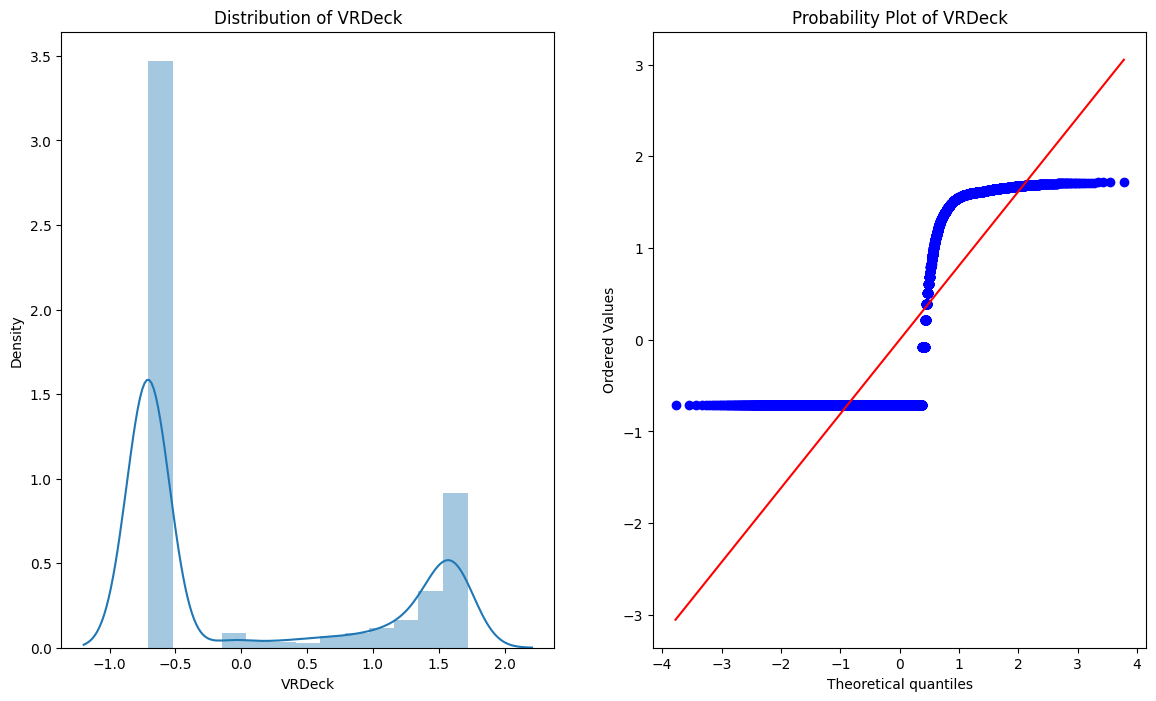

In [56]:
CheckSkewness(data, 'VRDeck')
CheckSkewness(after, 'VRDeck')

In [53]:
trf2 = ColumnTransformer([
    ('power', PowerTransformer(), ['VRDeck'])
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

In [55]:
after = trf2.fit_transform(data)

In [73]:
data['Age_seg'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 50, 65, float('intf')], labels=['Child', 'Young_Child', 'Young', 'Adult_young', 'adults', 'old'] )

ValueError: Bin labels must be one fewer than the number of bin edges

In [72]:
data['Age_seg']

0       Adult_young
1             Young
2            adults
3             Young
4       Young_Child
           ...     
8688    Adult_young
8689    Young_Child
8690          Young
8691          Young
8692    Adult_young
Name: Age_seg, Length: 8693, dtype: category
Categories (6, object): ['Child' < 'Young_Child' < 'Young' < 'Adult_young' < 'adults' < 'old']

In [63]:
from sklearn.preprocessing import KBinsDiscretizer

In [66]:
kbn = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [69]:
data['Age_qun'] = kbn.fit_transform(data[['Age']])

In [70]:
data['Age_qun']

0       7.0
1       4.0
2       9.0
3       6.0
4       1.0
       ... 
8688    8.0
8689    2.0
8690    4.0
8691    6.0
8692    8.0
Name: Age_qun, Length: 8693, dtype: float64